<a href="https://colab.research.google.com/github/ppn101/Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importing all the required dependencies.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [10]:
#Importing the dataset as a dataframe.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing_Data.csv")

In [11]:
#Returning the first 3 rows of the dataframe.
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [12]:
#Getting a statistical summary of the dataframe.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
#Getting information on the number of columns and rows in the dataframe.
df.shape

(506, 14)

In [14]:
#Getting information on the datatypes of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [15]:
#Checking the count of null values in each columns in the dataframe.
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [21]:
#Removing instanced with NA values and storing the resulting data into a new dataframe.
df_cleaned = df.dropna()

In [22]:
#Checking the number of columns and rows in the resultant dataframe.
print(df_cleaned.shape)

(394, 14)


In [23]:
#Re checking the number of null instances in the new dataframe.
df_cleaned.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [55]:
#Creating a correlation table for the given features and label in the dataframe.
corr = df_cleaned.corr()
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.188075  0.391552 -0.051970  0.416160 -0.227170  0.341311   
ZN      -0.188075  1.000000 -0.521256 -0.033357 -0.515660  0.343210 -0.568174   
INDUS    0.391552 -0.521256  1.000000  0.049820  0.762737 -0.403068  0.642387   
CHAS    -0.051970 -0.033357  0.049820  1.000000  0.076661  0.095308  0.072644   
NOX      0.416160 -0.515660  0.762737  0.076661  1.000000 -0.316563  0.732540   
RM      -0.227170  0.343210 -0.403068  0.095308 -0.316563  1.000000 -0.248670   
AGE      0.341311 -0.568174  0.642387  0.072644  0.732540 -0.248670  1.000000   
DIS     -0.365052  0.645359 -0.696569 -0.095037 -0.768137  0.218713 -0.753547   
RAD      0.608667 -0.298773  0.591944  0.014102  0.628170 -0.236057  0.443585   
TAX      0.560841 -0.305768  0.734204 -0.026513  0.679824 -0.320561  0.504472   
PTRATIO  0.265428 -0.422164  0.395691 -0.104995  0.210216 -0.390686  0.264968   
B       -0.386254  0.169894 

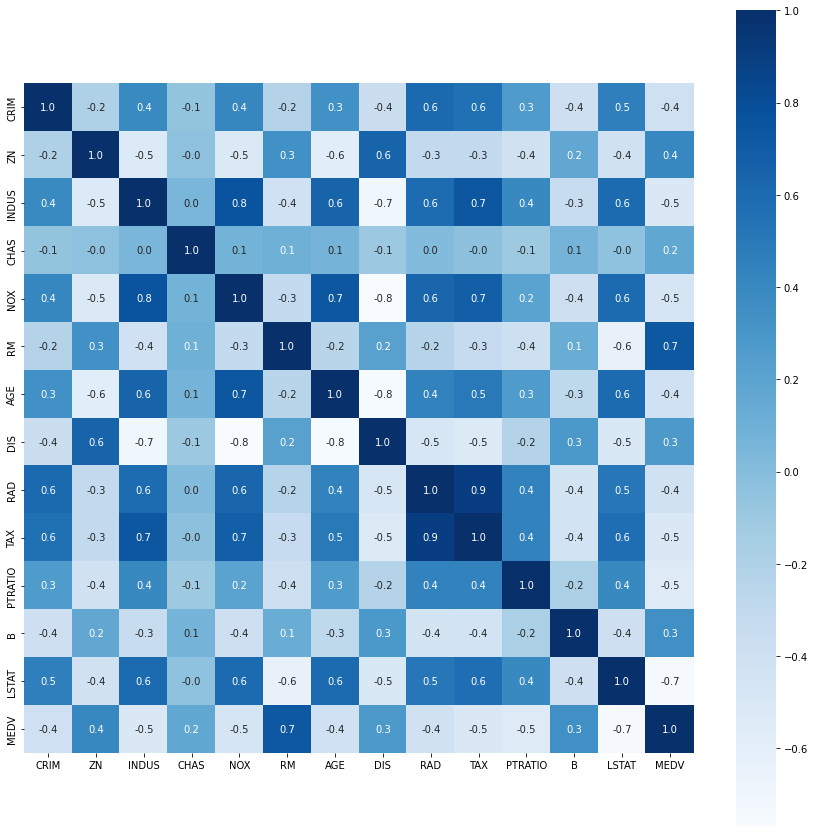

In [40]:
#Generating a heatmap to visualise the correlation table created earlier - In order to identify highly correlated variables in the dataframe.
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True, square = True, annot= True, fmt = ".1f", annot_kws= {'size':10}, cmap = "Blues")

In [41]:
#splitting the dataframe into feature and label dataframes respectively.
feature = df_cleaned.drop("MEDV", axis = 1)
label = df_cleaned["MEDV"]

In [42]:
print(feature.shape)
print(label.shape)

(394, 13)
(394,)


In [44]:
feature.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [45]:
label.head(3)

0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64

In [80]:
#Splitting the data into train and test dataframes.
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = 0.2, random_state = 1)

In [81]:
print(feature_train.shape)
print(feature_test.shape)
print(label_train.shape)
print(label_test.shape)

(315, 13)
(79, 13)
(315,)
(79,)


In [82]:
#Selecting the model according to the given problem statement. Also, training the model on training data
model = XGBRegressor()
model.fit(feature_train, label_train)

[00:16:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [83]:
#Checking model performance on training data and selecting r square error as evaluation metric (Since this is a regression model). 
predict_train = model.predict(feature_train)
train_accuracy = metrics.r2_score(label_train, predict_train)
print("The R Square Error for Training Data is :" + " " + str(round(train_accuracy,2)))

The R Square Error for Training Data is : 0.98


In [84]:
#Checking model performance on training data and selecting mean absolute error as evaluation metric (Since this is a regression model). 
predict_train = model.predict(feature_train)
train_accuracy = metrics.mean_absolute_error(label_train, predict_train)
print("The Mean Absolute Error for Training Data is :" + " " + str(round(train_accuracy,2)))

The Mean Absolute Error for Training Data is : 0.95


In [85]:
#Checking model performance on test data and selecting r square error as evaluation metric (Since this is a regression model).
predict_test = model.predict(feature_test)
test_accuracy = metrics.r2_score(label_test, predict_test)
print("The R Square Error for Test Data is :" + " " + str(round(test_accuracy,2)))

The R Square Error for Test Data is : 0.87


In [86]:
#Checking model performance on test data and selecting mean absolute error as evaluation metric (Since this is a regression model). 
predict_test = model.predict(feature_test)
test_accuracy = metrics.mean_absolute_error(label_test, predict_test)
print("The Mean Absolute Error for Test Data is :" + " " + str(round(test_accuracy,2)))

The Mean Absolute Error for Test Data is : 2.49


Text(0.5, 1.0, 'Scatter plot for training data - Actual vs Predicted price')

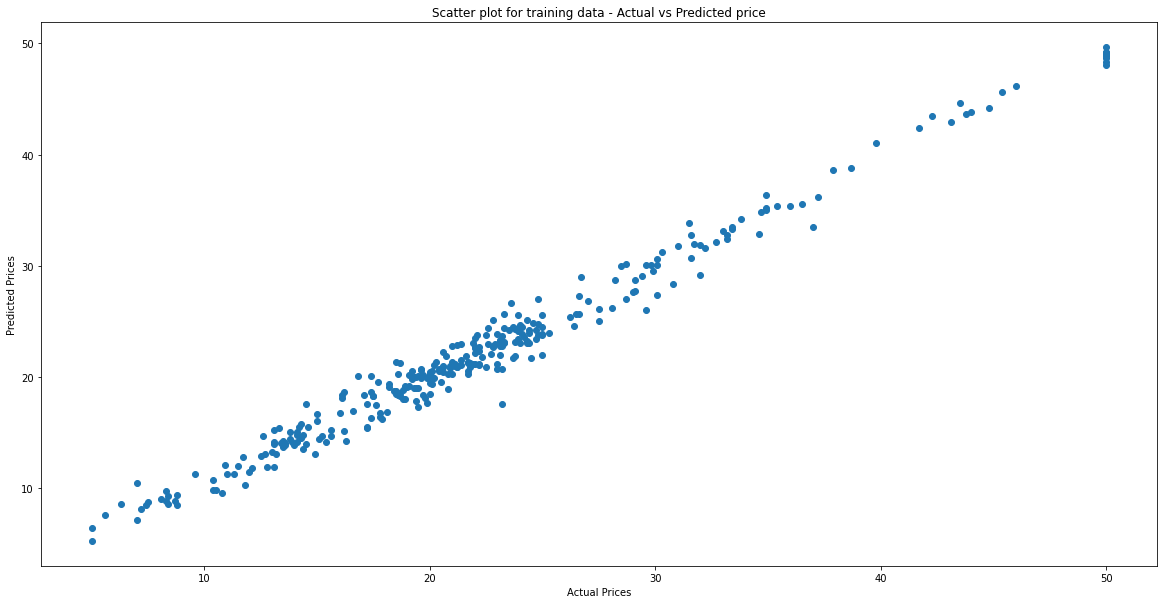

In [95]:
#Plotting a scatterplot for model performance on training data
plt.figure(figsize= (20,10))
plt.scatter(label_train, predict_train)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter plot for training data - Actual vs Predicted price")

Text(0.5, 1.0, 'Scatter plot for test data - Actual vs Predicted price')

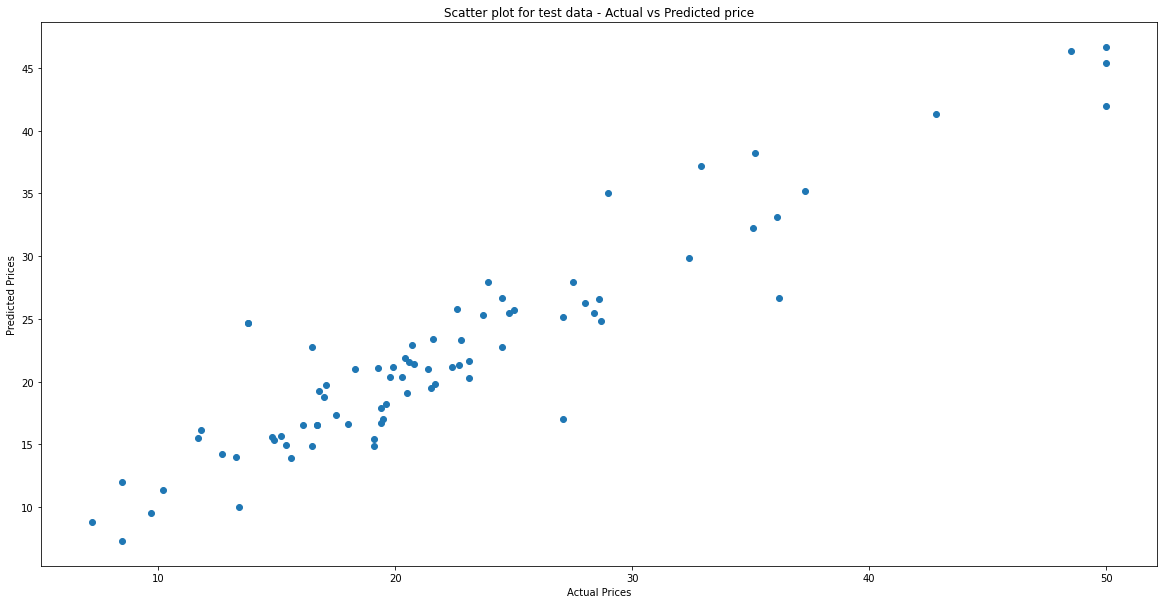

In [94]:
#Plotting a scatterplot for model performance on test data
plt.figure(figsize= (20,10))
plt.scatter(label_test, predict_test)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter plot for test data - Actual vs Predicted price")
